Problem 1 (Python)

1. Use the following dataset about adults: https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csv (Links to an external site.)
2. Create a contingency table of workclass and sex, and plot it.
3. Create a contingency table of sex and marital status, and plot it.
4. Create a new data frame, adultOver40, for those whose age > 40.
5. Recreate the contingency table of sex and marital status for adultOver40.
6. Summarize your findings about parts 2-5.
7. Determine whether any outliers exist for the education field. 
8. Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?
9. Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.


# IMPORTING LIBRARIES

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
pd.set_option('display.max_rows',None)

# LOADING DATA

In [2]:
#Loading data
data = pd.read_csv('https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv', sep=",")

# EXPLORING DATA

In [3]:
#Data shape
data.shape

(14797, 9)

In [4]:
#Data glimps
data.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


In [5]:
#Checking missing values
data.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
sex               0
capital-gain      0
capital-loss      0
income            0
dtype: int64

In [6]:
#Checking data type for all the features
data.dtypes

age                int64
workclass         object
education          int64
marital-status    object
occupation        object
sex               object
capital-gain       int64
capital-loss       int64
income            object
dtype: object

In [7]:
#Checking count of unique values in each features
for i in data.columns:
  print(f'{i:{20}} {data[i].nunique()}')

age                  73
workclass            9
education            16
marital-status       7
occupation           15
sex                  2
capital-gain         110
capital-loss         78
income               2


In [8]:
#Checking value count of workclass feature
data.workclass.value_counts()

Private             10281
Self-emp-not-inc     1170
Local-gov             969
?                     829
State-gov             586
Self-emp-inc          498
Federal-gov           454
Without-pay             5
Never-worked            5
Name: workclass, dtype: int64

workclass feature have missing values 829 which We need to replace with most frequent value

In [9]:
#Finding most frequent value in the workclass feature
data.workclass.mode()

0    Private
dtype: object

In [10]:
#Replacing missing values with most frequent value
data['workclass'] = data['workclass'].replace('?','Private')

In [11]:
#Checking value count of workclass feature
data.workclass.value_counts()

Private             11110
Self-emp-not-inc     1170
Local-gov             969
State-gov             586
Self-emp-inc          498
Federal-gov           454
Without-pay             5
Never-worked            5
Name: workclass, dtype: int64

# CREATE A CONTINGENCY TABLE OF WORKCLASS AND SEX, AND PLOT IT

### CONTINGENCY TABLE:WORKCLASS AND SEX

In [12]:
c_table1 = data[['workclass','sex']].value_counts().unstack().rename_axis(None,axis=1)
c_table1['Female_%'] = round(c_table1['Female']/c_table1['Female'].sum()*100)
c_table1['Male_%'] = round(c_table1['Male']/c_table1['Male'].sum()*100)
c_table1

,Female,Male,Female_%,Male_%
workclass,,,,
Federal-gov,149,305,3.0,3.0
Local-gov,377,592,8.0,6.0
Never-worked,1,4,0.0,0.0
Private,3951,7159,80.0,72.0
Self-emp-inc,54,444,1.0,4.0
Self-emp-not-inc,178,992,4.0,10.0
State-gov,201,385,4.0,4.0
Without-pay,1,4,0.0,0.0


### PLOT: WORKCLASS AND SEX

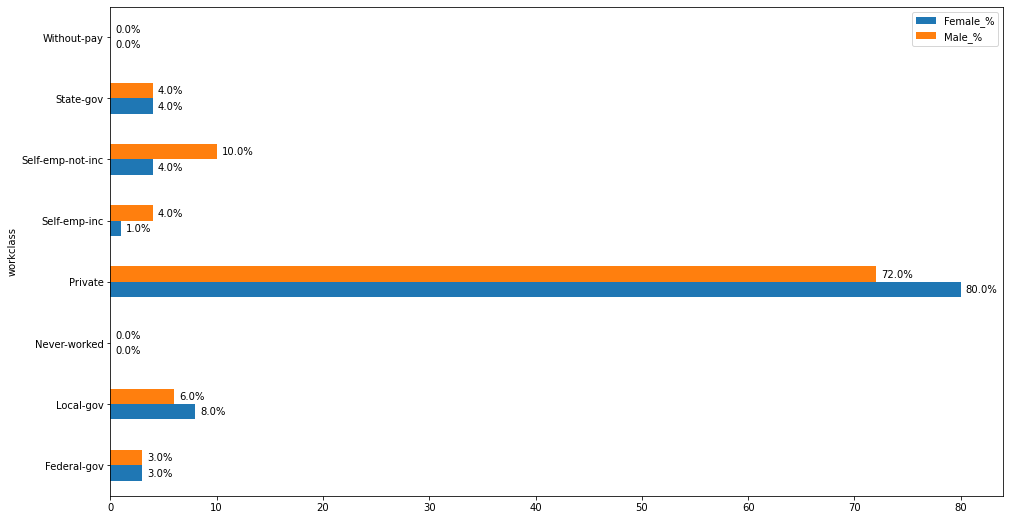

In [13]:
ax = c_table1.iloc[:,2:].plot(kind='barh', figsize=(16,9));
for p in ax.patches:
    ax.annotate("%.1f%%" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

### SUMMARY PONTS: WORKCLASS AND SEX

1. In female gender, 80% are working in private companies and 20% are wokring in other than private companies
2. in male gender, 72% are working in private companies and 28% are wokring in other than private companies
3. The data have maximum records for private workingclass

# CREATE A CONTINGENCY TABLE OF SEX AND MARITAL STATUS, AND PLOT IT

### CONTINGENCY TABLE:MARITAL STATUS AND SEX

In [14]:
c_table2 = data[['marital-status','sex']].value_counts().unstack().rename_axis(None,axis=1)
c_table2['Female_%'] = round(c_table2['Female']/c_table2['Female'].sum()*100)
c_table2['Male_%'] = round(c_table2['Male']/c_table2['Male'].sum()*100)
c_table2

,Female,Male,Female_%,Male_%
marital-status,,,,
Divorced,1219,795,25.0,8.0
Married-AF-spouse,7,4,0.0,0.0
Married-civ-spouse,761,6010,15.0,61.0
Married-spouse-absent,95,104,2.0,1.0
Never-married,2160,2717,44.0,27.0
Separated,290,182,6.0,2.0
Widowed,380,73,8.0,1.0


### PLOT: MARITAL STATUS AND SEX

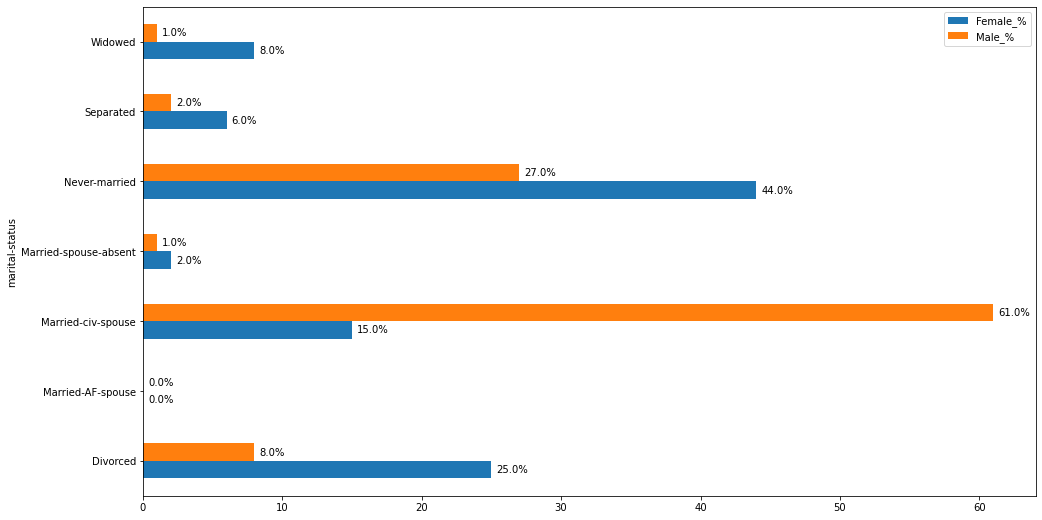

In [15]:
ax = c_table2.iloc[:,2:].plot(kind='barh', figsize=(16,9));
for p in ax.patches:
    ax.annotate("%.1f%%" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

### SUMMARY PONTS: MARITAL STATUS AND SEX

1. In female gender, 44% are never married females and 25% are divorced females
2. In male gender, 61% are married-civilian-spouse males and 27% are never married males
3. The data have maximum records for married-civilian-spouse, never married and divorced marital status

# CREATING NEW DATAFRAME: ADULTOVER40

In [16]:
adultOver40 = data[data['age']>40]
adultOver40.shape

(6144, 9)

# RECREATE THE CONTINGENCY TABLE OF SEX AND MARITAL STATUS FOR ADULTOVER40.

### CONTINGENCY TABLE ON ADULTOVER40:MARITAL STATUS AND SEX

In [17]:
c_table3 = adultOver40[['marital-status','sex']].value_counts().unstack().rename_axis(None,axis=1)
c_table3['Female_%'] = round(c_table3['Female']/c_table3['Female'].sum()*100)
c_table3['Male_%'] = round(c_table3['Male']/c_table3['Male'].sum()*100)
c_table3

,Female,Male,Female_%,Male_%
marital-status,,,,
Divorced,720,448,40.0,10.0
Married-civ-spouse,305,3383,17.0,78.0
Married-spouse-absent,38,47,2.0,1.0
Never-married,256,315,14.0,7.0
Separated,133,74,7.0,2.0
Widowed,354,71,20.0,2.0


### PLOT ON ADULTOVER40: MARITAL STATUS AND SEX

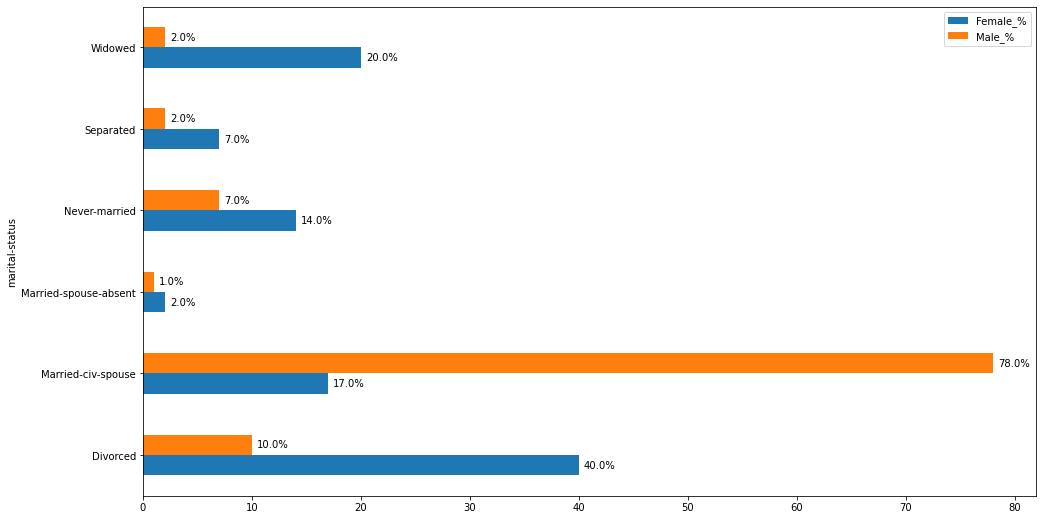

In [18]:
ax = c_table3.iloc[:,2:].plot(kind='barh', figsize=(16,9));
for p in ax.patches:
    ax.annotate("%.1f%%" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

### SUMMARY POINTS ON ADULTOVER40: MARITAL STATUS AND SEX

1. In male over 40 age, 78% male are married civilian spouse status and 10% are divorced status, It means the data have maximum records for married-civilian-spouse
2. In female over 40 age, 40% females have divorced status, 20% are widowed status & 14% females are still single , It means the data have maximum records for Divorced, Widowed & never married

# OUTLIERS DETECTION: EDUCATION

### DETECTING OUTLIERS USING Z-SCORE ON EDUCATION

In [20]:
def detecting_outliers_using_zscore(data, variable):
    df = data[variable].to_frame()
    df['zscore'] = abs(zscore(df[variable]))
    df['is_outliers'] = ['outlier' if i>3 else 'not outlier' for i in df['zscore']]
    outliers = df[df['is_outliers']=='outlier']
    return outliers

In [21]:
outliers = detecting_outliers_using_zscore(data, 'education')
outliers

,education,zscore,is_outliers
72,2,3.105523,outlier
101,1,3.490403,outlier
199,2,3.105523,outlier
243,2,3.105523,outlier
437,2,3.105523,outlier
541,2,3.105523,outlier
877,2,3.105523,outlier
1182,2,3.105523,outlier
1223,2,3.105523,outlier
1308,2,3.105523,outlier


In [22]:
outliers.education.value_counts()

2    89
1    24
Name: education, dtype: int64

### SUMMARY POINTS ON DETECTING OUTLIERS USING Z-SCORE ON EDUCATION

1. We have detected 113 rows have an outliers in education features in which eduction has been mentioned as 1st and 2nd standard

### DETECTING OUTLIERS USING IQR RANGE METHOD ON EDUCATION

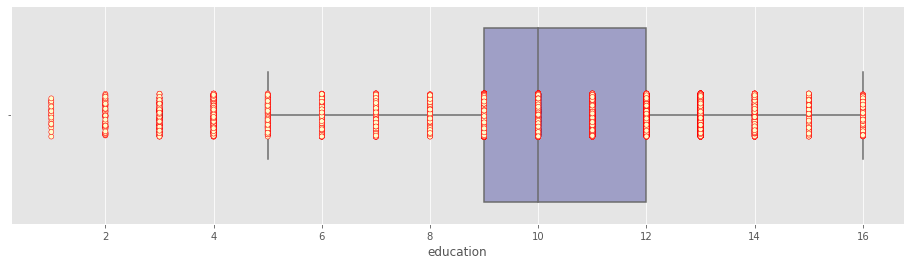

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(16,4))
sns.boxplot(x=data['education'], color='#9999cc');
sns.stripplot(x=data['education'], color='#ffffcc',edgecolor='red',linewidth=0.5);

In [24]:
def detect_outliers_boxplot(data,variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    Outliers_lower_bound = data[variable][data[variable]<Q1-(1.5*IQR)]
    Outliers_upper_bound = data[variable][data[variable]>Q3+(1.5*IQR)]
    return Outliers_lower_bound, Outliers_upper_bound

In [26]:
Outliers_lower, Outliers_upper = detect_outliers_boxplot(data, 'education')

In [27]:
Outliers_lower.value_counts()

4    283
3    156
2     89
1     24
Name: education, dtype: int64

In [28]:
Outliers_lower.value_counts().sum()

552

In [29]:
Outliers_upper.value_counts()

Series([], Name: education, dtype: int64)

### SUMMARY POINTS ON DETECTING OUTLIERS USING IQR RANGE METHOD ON EDUCATION

1. We have detected 552 rows as an outliers in education feature using IQR range method
2. Standard 1st, 2nd, 3rd & 4th are the values have in the education feature which are an outliers

# OUTLIERS DETECTION: AGE

### DETECTING OUTLIERS USING Z-SCORE ON AGE

In [30]:
outliers_age = detecting_outliers_using_zscore(data, 'age')
outliers_age.head()

,age,zscore,is_outliers
99,90,3.751354,outlier
204,80,3.020275,outlier
492,90,3.751354,outlier
552,88,3.605138,outlier
885,90,3.751354,outlier


In [31]:
outliers_age.age.value_counts().sort_index()

80    10
81     5
82     8
83     2
84     5
85     3
86     1
87     1
88     2
90    23
Name: age, dtype: int64

In [32]:
outliers_age.age.value_counts().sum()

60

### SUMMARY POINTS ON DETECTING OUTLIERS USING Z-SCORE ON AGE

We have detected 60 rows as an outliers in age feature in which age has been recorded from 80 years old to 90 years old

### DETECTING OUTLIERS USING IQR RANGE METHOD ON AGE

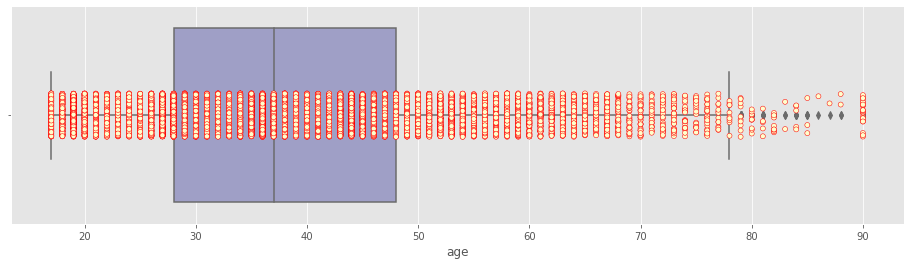

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(16,4))
sns.boxplot(x=data['age'], color='#9999cc');
sns.stripplot(x=data['age'], color='#ffffcc',edgecolor='red',linewidth=0.5);

In [34]:
Outliers_lower, Outliers_upper = detect_outliers_boxplot(data, 'age')

In [35]:
Outliers_lower.value_counts()

Series([], Name: age, dtype: int64)

In [36]:
Outliers_upper.value_counts().sort_index()

79    10
80    10
81     5
82     8
83     2
84     5
85     3
86     1
87     1
88     2
90    23
Name: age, dtype: int64

In [37]:
Outliers_upper.value_counts().sum()

70

### SUMMARY POINTS ON DETECTING OUTLIERS USING IQR RANGE METHOD ON AGE

1. We have detected 70 rows as an outliers in age feature in which age has been recorded from 79 years old to 90 years old
2. Age 90 is an extreme outliers which has 23 records

# SELECT ONLY RECORDS WITH AGE  AT LEAST 80, AND CONSTRUCT A HISTOGRAM OF AGE. EXPLAIN WHAT YOU SEE

###   SELECTING ONLY RECORDS WITH AGE ATLEAST 80 AND CREATE HISTOGRAM

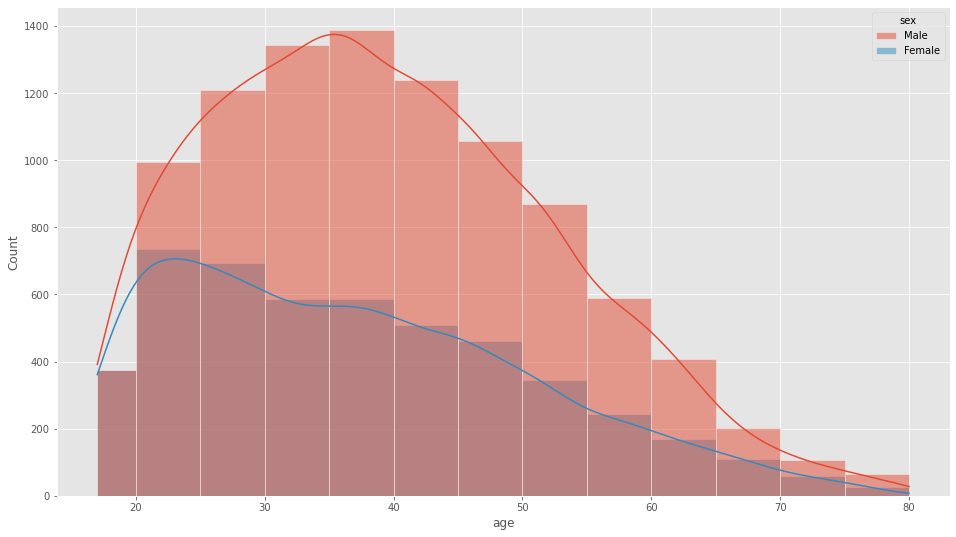

In [38]:
bins = [17,20,25,30,35,40,45,50,55,60,65,70,75,80]
plt.figure(figsize=(16,9))
sns.histplot(x=data['age'][data['age']<=80],hue=data['sex'],kde=True, bins=bins);

### SUMMARY ON HISTOGRAM: AGE ATLEAST 80

for male:
1. The data spread is from about 17 age to 80 age.
2. As per the above histogram, the data have right skewed it means maximum records have an age between 25 to 45 age
3. Age 35 to 40 as an identified the peaks, which are the tallest clusters of the bars
4. The peaks represent the most common values. Assess the spread of the sample to understand how much the data varies.

for female:
1. As per the above histogram, the data have right skewed it means maximum records have an age between 17 to 45 age
2. Age 20 to 30 as an identified the peaks, which are the tallest clusters of the bars

# END